In [6]:
import os
import pathlib
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import Model
from keras.layers import *
from keras.preprocessing.image import *
import tensorflow as tf

In [52]:
def load_img_and_label(img_paths):
    images = []
    labels = []
    
    for img_path in img_paths:
        image = load_img(img_path, target_size=(32,32),color_mode='grayscale')
        image = img_to_array(image)
        label = img_path.split(os.path.sep)[-2]
        label = 'positive' in label
        label = float(label)
        images.append(image)
        labels.append(label)
        
    return np.array(images), np.array(labels)
    

In [53]:
def build_network():
    input_layer = Input(shape=(32, 32, 1))
    x = Conv2D(filters=101,
               kernel_size=(5, 5),
               padding='same',
               strides=(1, 1))(input_layer)

    x = ELU()(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2),
                     padding='same',
                     strides=(2, 2))(x)
    x = Dropout(0.2)(x)

    x = Conv2D(filters=101,
               kernel_size=(5, 5),
               padding='same',
               strides=(1, 1))(x)
    x = ELU()(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2),
                     padding='same',
                     strides=(2, 2))(x)
    x = Dropout(0.2)(x)
    
    x = Conv2D(filters=101,
               kernel_size=(5, 5),
               padding='same',
               strides=(1, 1))(input_layer)
    x = ELU()(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2),
                     strides=(2, 2))(x)
    x = Dropout(0.2)(x)

    x = Flatten()(x)
    x = Dense(units=500)(x)
    x = ELU()(x)
    x = Dropout(0.2)(x)

    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output)
    return model

In [54]:
files_pattern = os.path.join('SMILEsmileD','SMILEs','*','*','*.jpg')
files_pattern = str(files_pattern)
dataset_paths = [*glob.glob(files_pattern)]

In [55]:
X, y = load_img_and_label(dataset_paths)

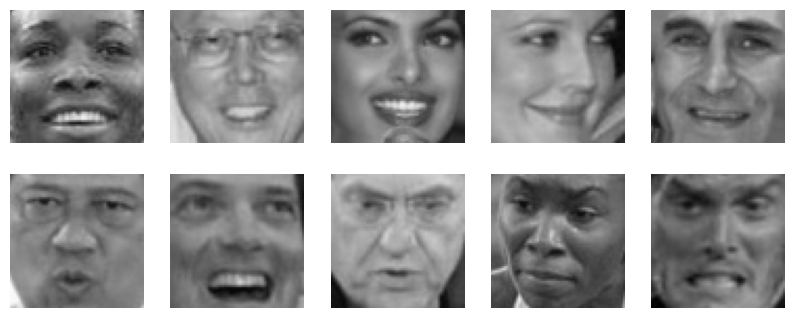

In [56]:
X /= 255.0

In [57]:
total = len(y)
total_pos = np.sum(y)
total_neg = total-total_pos

In [58]:
print(total, total_neg, total_pos)

13165 9475.0 3690.0


In [59]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

In [60]:
(X_train, X_val, y_train, y_val) = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=1234 )

In [61]:
model = build_network()

In [62]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [63]:
batch_size = 64
EPOCHS = 100
model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=EPOCHS, batch_size=batch_size, class_weight={
    1.0: total / total_pos,
    0.0: total / total_neg
})

Epoch 1/100
132/132 [==============================] - 30s 226ms/step - loss: 9.2180 - accuracy: 0.6600 - val_loss: 0.9759 - val_accuracy: 0.6189
Epoch 2/100
132/132 [==============================] - 29s 223ms/step - loss: 1.0035 - accuracy: 0.7932 - val_loss: 1.1370 - val_accuracy: 0.7513
Epoch 3/100
132/132 [==============================] - 29s 222ms/step - loss: 0.8392 - accuracy: 0.8336 - val_loss: 0.7988 - val_accuracy: 0.7907
Epoch 4/100
132/132 [==============================] - 30s 224ms/step - loss: 0.7155 - accuracy: 0.8626 - val_loss: 1.1762 - val_accuracy: 0.8016
Epoch 5/100
132/132 [==============================] - 30s 224ms/step - loss: 0.5772 - accuracy: 0.8800 - val_loss: 5.2574 - val_accuracy: 0.7380
Epoch 6/100
132/132 [==============================] - 29s 222ms/step - loss: 0.4962 - accuracy: 0.9013 - val_loss: 5.6169 - val_accuracy: 0.7504
Epoch 7/100
132/132 [==============================] - 29s 222ms/step - loss: 0.4378 - accuracy: 0.9172 - val_loss: 5.0664 -

Epoch 57/100
132/132 [==============================] - 36s 276ms/step - loss: 0.1333 - accuracy: 0.9919 - val_loss: 10.3694 - val_accuracy: 0.8192
Epoch 58/100
132/132 [==============================] - 35s 263ms/step - loss: 0.1279 - accuracy: 0.9927 - val_loss: 6.0700 - val_accuracy: 0.8548
Epoch 59/100
132/132 [==============================] - 35s 267ms/step - loss: 0.0877 - accuracy: 0.9928 - val_loss: 5.5876 - val_accuracy: 0.8794
Epoch 60/100
132/132 [==============================] - 33s 248ms/step - loss: 0.1189 - accuracy: 0.9932 - val_loss: 3.0705 - val_accuracy: 0.8918
Epoch 61/100
132/132 [==============================] - 30s 226ms/step - loss: 0.1024 - accuracy: 0.9932 - val_loss: 3.7876 - val_accuracy: 0.8908
Epoch 62/100
132/132 [==============================] - 30s 224ms/step - loss: 0.1020 - accuracy: 0.9949 - val_loss: 5.2641 - val_accuracy: 0.8738
Epoch 63/100
132/132 [==============================] - 31s 232ms/step - loss: 0.1989 - accuracy: 0.9919 - val_loss: 

In [65]:
test_loss, acurcy = model.evaluate(X_test,y_test)

83/83 [==============================] - 2s 25ms/step - loss: 8.2161 - accuracy: 0.8826


In [66]:
acurcy


0.8826434016227722

In [67]:
test_loss

8.216114044189453

In [68]:
y_pred = model.predict(X_test)

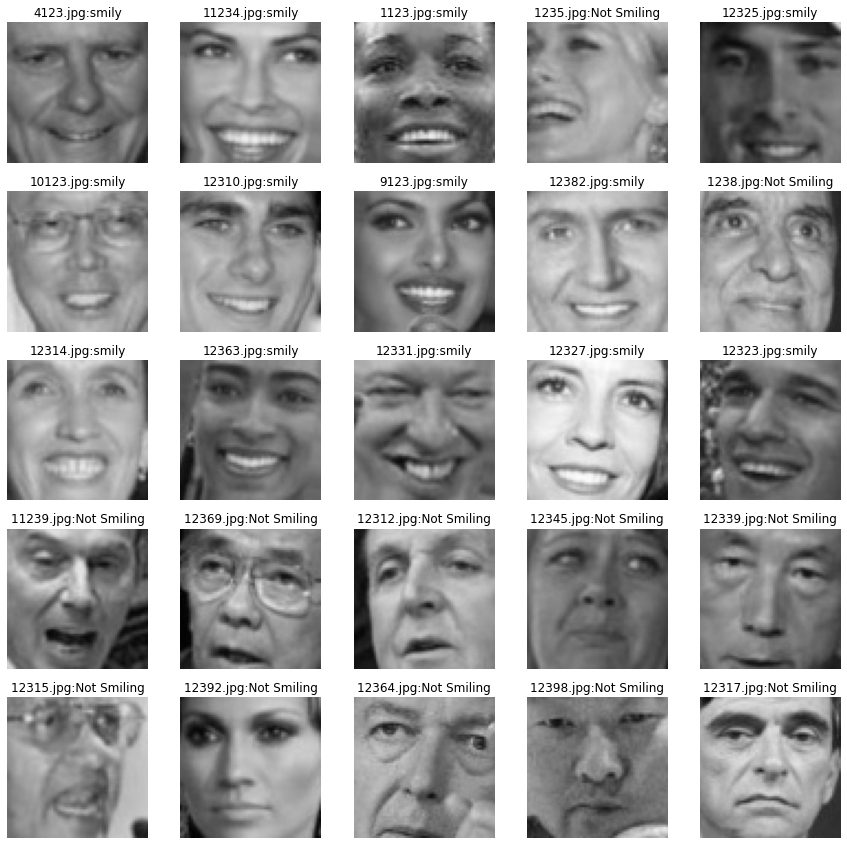

In [141]:
gray = gray.reshape([32,32,1])

In [142]:
gray.shape

(32, 32, 1)